In [1]:
import pandas as pd
import numpy as np

In [ ]:
airbnb = pd.read_csv('airbnb.csv')
blueprinty = pd.read_csv('blueprinty.csv')

In [5]:
airbnb.head()

,Unnamed: 0,id,days,last_scraped,host_since,room_type,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value,instant_bookable
0,1,2515,3130,4/2/2017,9/6/2008,Private room,1.0,1.0,59,150,9.0,9.0,9.0,f
1,2,2595,3127,4/2/2017,9/9/2008,Entire home/apt,1.0,0.0,230,20,9.0,10.0,9.0,f
2,3,3647,3050,4/2/2017,11/25/2008,Private room,1.0,1.0,150,0,NaN,NaN,NaN,f
3,4,3831,3038,4/2/2017,12/7/2008,Entire home/apt,1.0,1.0,89,116,9.0,9.0,9.0,f
4,5,4611,3012,4/2/2017,1/2/2009,Private room,NaN,1.0,39,93,9.0,8.0,9.0,t


In [6]:
blueprinty.head()

,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0


In [11]:
blueprinty.info()
blueprinty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patents     1500 non-null   int64  
 1   region      1500 non-null   object 
 2   age         1500 non-null   float64
 3   iscustomer  1500 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 47.0+ KB


,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0
...,...,...,...,...
1495,2,Northeast,18.5,1
1496,3,Southwest,22.5,0
1497,4,Southwest,17.0,0
1498,3,South,29.0,0


In [10]:
airbnb.info()
airbnb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5 non-null      int64  
 1   id                         5 non-null      int64  
 2   days                       5 non-null      int64  
 3   last_scraped               5 non-null      object 
 4   host_since                 5 non-null      object 
 5   room_type                  5 non-null      object 
 6   bathrooms                  4 non-null      float64
 7   bedrooms                   5 non-null      float64
 8   price                      5 non-null      int64  
 9   number_of_reviews          5 non-null      int64  
 10  review_scores_cleanliness  4 non-null      float64
 11  review_scores_location     4 non-null      float64
 12  review_scores_value        4 non-null      float64
 13  instant_bookable           5 non-null      object 
dty

,Unnamed: 0,id,days,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value
count,5.000000,5.000000,5.000000,4.0,5.000000,5.000000,5.000000,4.0,4.000000,4.0
mean,3.000000,3439.800000,3071.400000,1.0,0.800000,113.400000,75.800000,9.0,9.000000,9.0
std,1.581139,885.525381,53.914748,0.0,0.447214,77.500323,63.790281,0.0,0.816497,0.0
min,1.000000,2515.000000,3012.000000,1.0,0.000000,39.000000,0.000000,9.0,8.000000,9.0
25%,2.000000,2595.000000,3038.000000,1.0,1.000000,59.000000,20.000000,9.0,8.750000,9.0
50%,3.000000,3647.000000,3050.000000,1.0,1.000000,89.000000,93.000000,9.0,9.000000,9.0
75%,4.000000,3831.000000,3127.000000,1.0,1.000000,150.000000,116.000000,9.0,9.250000,9.0
max,5.000000,4611.000000,3130.000000,1.0,1.000000,230.000000,150.000000,9.0,10.000000,9.0


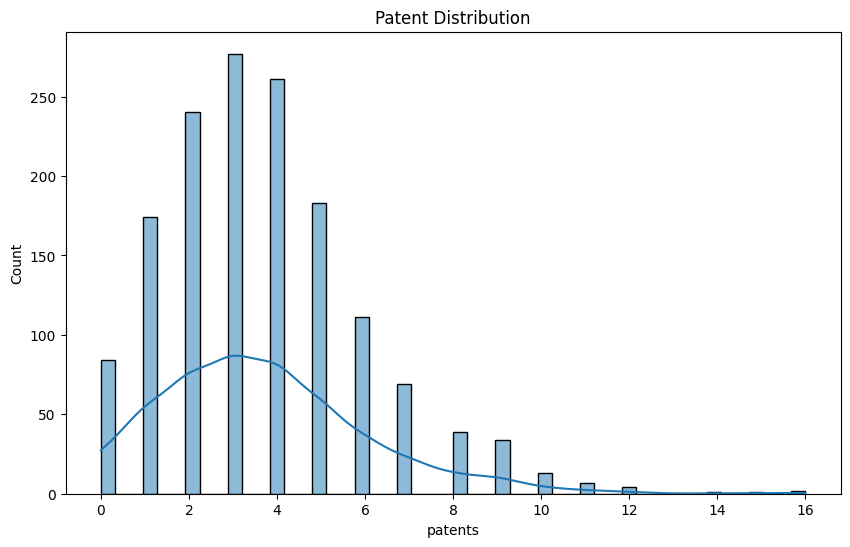

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Patent Distribution')
sns.histplot(blueprinty['patents'], bins=50, kde=True)
plt.show()

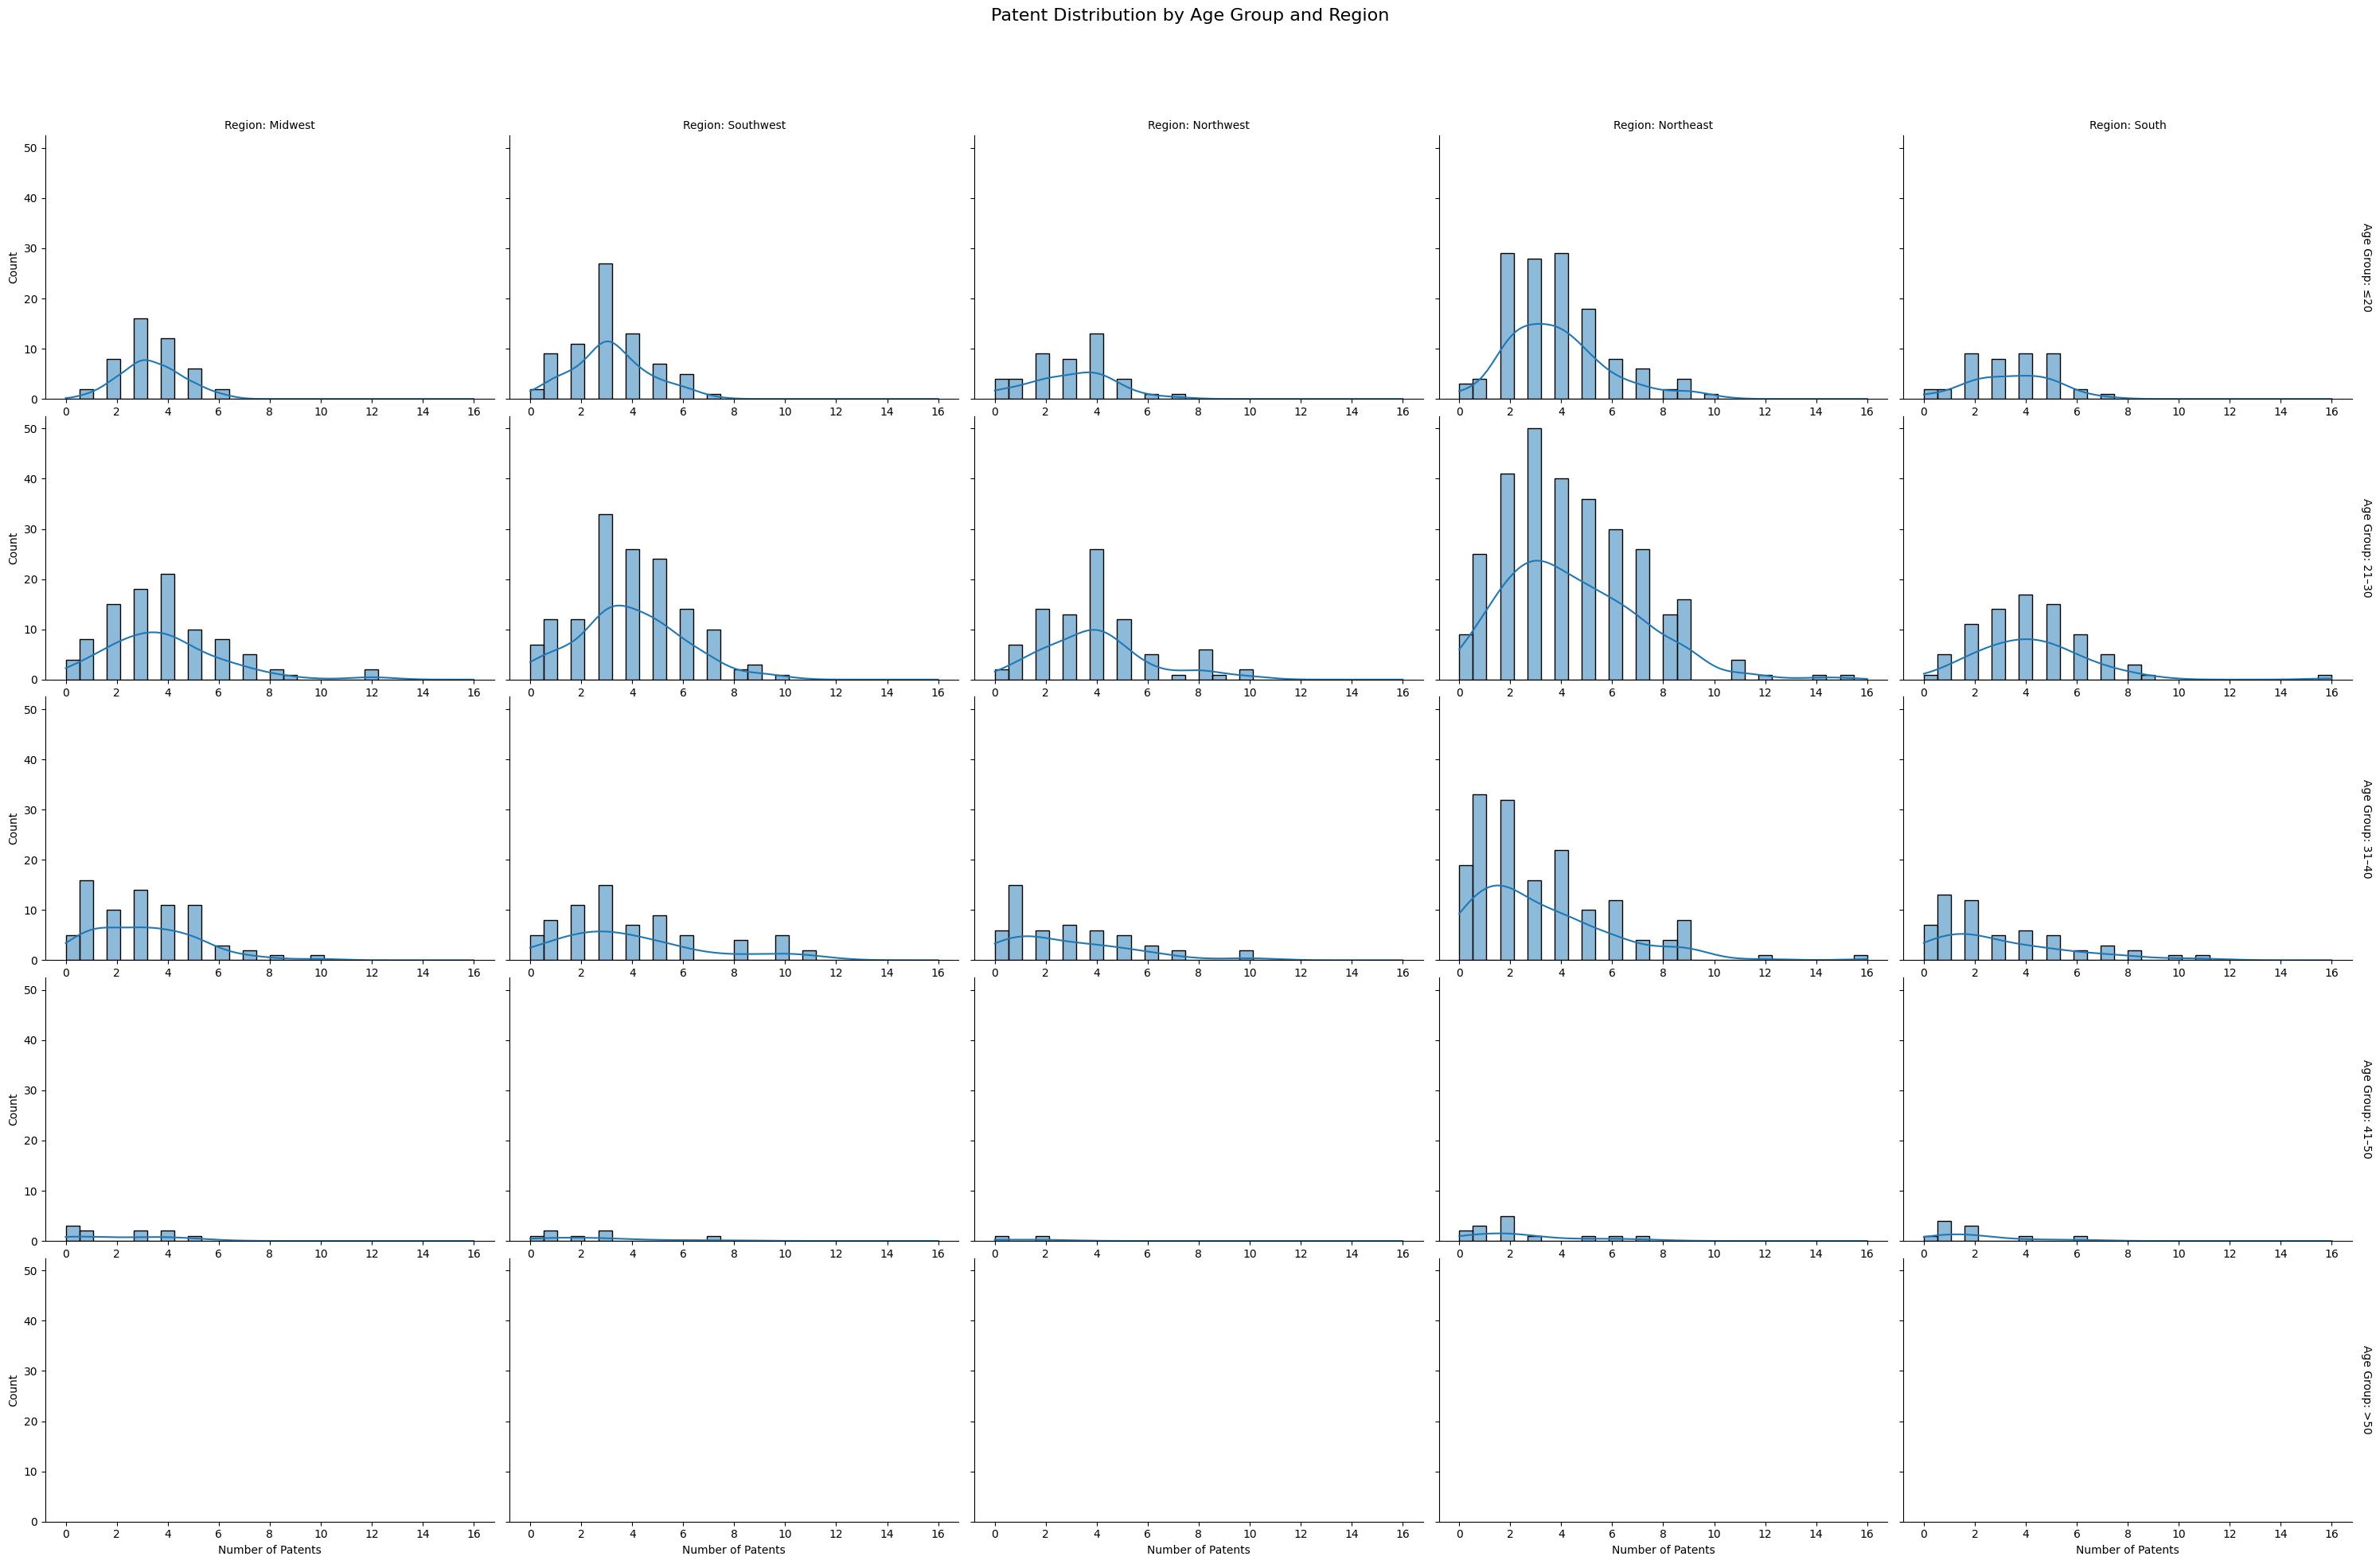

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定年齡分組（你可以依需要調整區間）
blueprinty['age_group'] = pd.cut(blueprinty['age'], bins=[0, 20, 30, 40, 50, 100], 
                                 labels=['≤20', '21–30', '31–40', '41–50', '>50'])

# 畫出直方圖，按「是否為客戶」分 Facet，並用不同年齡分組顯示
g = sns.displot(
    data=blueprinty,
    x="patents",
    col="region",     
    row="age_group",         # 年齡分組
    kind="hist",
    bins=30,
    kde=True,
    height=4,
    aspect=1.5,
    facet_kws={'margin_titles': True}
)

g.set_axis_labels("Number of Patents", "Count")
g.set_titles(col_template="Customer: {col_name}")
g.set_titles(col_template="Region: {col_name}", row_template="Age Group: {row_name}")
plt.subplots_adjust(top=0.9)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.suptitle("Patent Distribution by Age Group and Region", fontsize=16)
plt.show()

In [19]:
patent_mean_bycustomer = blueprinty.groupby('iscustomer')['patents'].mean()
patent_mean_bycustomer

iscustomer
0    3.473013
1    4.133056
Name: patents, dtype: float64

In [20]:
patent_mean_byage = blueprinty.groupby('age_group')['patents'].mean()
patent_mean_byage

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/1344393124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patent_mean_byage = blueprinty.groupby('age_group')['patents'].mean()


age_group
≤20      3.454277
21–30    4.156695
31–40    3.230769
41–50    2.186047
>50           NaN
Name: patents, dtype: float64

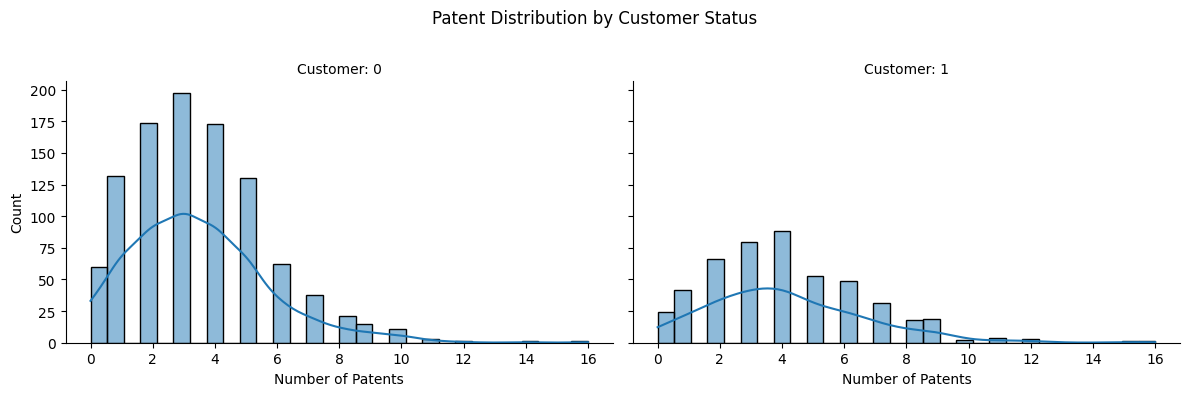

In [27]:
# 設定年齡分組（你可以依需要調整區間）
blueprinty['age_group'] = pd.cut(blueprinty['age'], bins=[0, 20, 30, 40, 50, 100], 
                                 labels=['≤20', '21–30', '31–40', '41–50', '>50'])

# 畫出直方圖，按「是否為客戶」分 Facet，並用不同年齡分組顯示
g = sns.displot(
    data=blueprinty,
    x="patents",
    col="iscustomer",        # 是否為客戶：0 or 1
    # row="age_group",         # 年齡分組
    kind="hist",
    bins=30,
    kde=True,
    height=4,
    aspect=1.5,
    facet_kws={'margin_titles': True}
)

g.set_axis_labels("Number of Patents", "Count")
g.set_titles(col_template="Customer: {col_name}")
# g.set_titles(col_template="Customer: {col_name}", row_template="Age Group: {row_name}")
plt.subplots_adjust(top=0.8)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.suptitle("Patent Distribution by Customer Status")
plt.show()

In [35]:
region_counts = blueprinty.groupby(['iscustomer', 'region']).size().unstack()
region_counts

region,Midwest,Northeast,Northwest,South,Southwest
iscustomer,,,,,
0,187,273,158,156,245
1,37,328,29,35,52


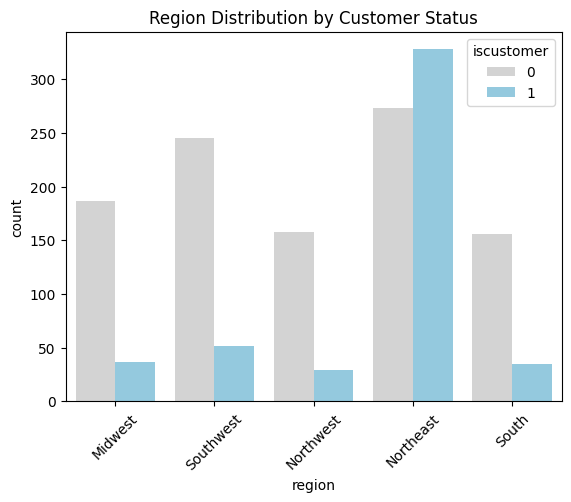

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 區域分布條形圖
sns.countplot(data=blueprinty, x='region', hue='iscustomer',palette={0: "lightgray", 1: "skyblue"})
plt.title('Region Distribution by Customer Status')
plt.xticks(rotation=45)
plt.show()

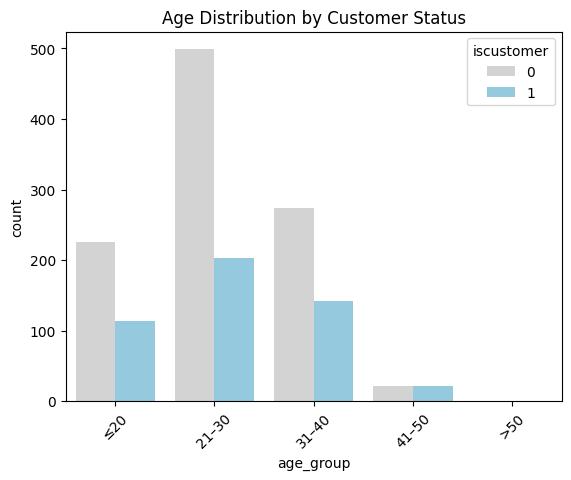

In [34]:
sns.countplot(data=blueprinty, x='age_group', hue='iscustomer',palette={0: "lightgray", 1: "skyblue"})
plt.title('Age Distribution by Customer Status')
plt.xticks(rotation=45)
plt.show()

In [38]:
import numpy as np
from scipy.special import gammaln  # 更穩定地處理 log(Y!)

def poisson_loglikelihood(lam, Y):
    """
    計算 Poisson 模型的 log-likelihood。
    
    參數:
    lam: float, Poisson 分布的 λ 參數（事件的平均發生率）
    Y: array-like, 一組觀察到的計數資料
    
    回傳:
    總對數概似值（log-likelihood）
    """
    if lam <= 0:
        return -np.inf  # λ 必須為正數，否則回傳負無限
    
    Y = np.asarray(Y)
    log_likelihood = np.sum(-lam + Y * np.log(lam) - gammaln(Y + 1))
    return log_likelihood

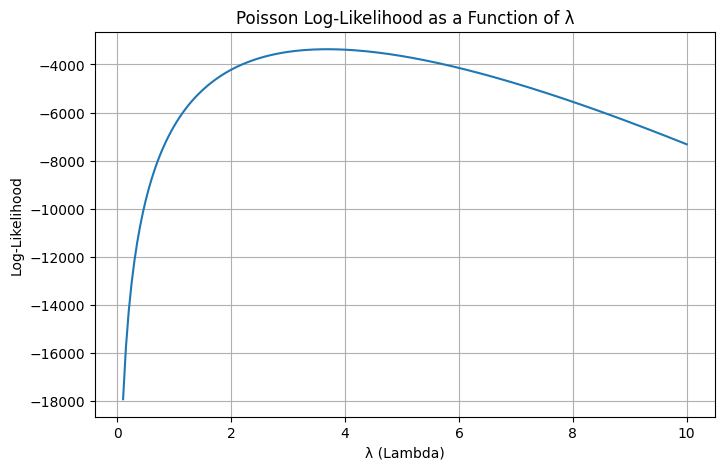

In [39]:
Y = blueprinty['patents']

lambda_values = np.linspace(0.1, 10, 200)
loglikelihood_values = [poisson_loglikelihood(lam, Y) for lam in lambda_values]

plt.figure(figsize=(8, 5))
plt.plot(lambda_values, loglikelihood_values)
plt.xlabel("λ (Lambda)")
plt.ylabel("Log-Likelihood")
plt.title("Poisson Log-Likelihood as a Function of λ")
plt.grid(True)
plt.show()

In [41]:
from scipy.optimize import minimize_scalar

# 目標函數要最大化，所以取 -loglikelihood 來做最小化
objective = lambda lam: -poisson_loglikelihood(lam, blueprinty['patents'])

result = minimize_scalar(objective, bounds=(0.1, 10), method='bounded')
lambda_mle = result.x
print("Estimated λ (MLE):", lambda_mle)

Estimated λ (MLE): 3.6846662261327716


In [60]:
import numpy as np
from scipy.special import gammaln

def poisson_regression_loglikelihood(beta, Y, X):
    """
    計算 Poisson 回歸模型的 log-likelihood。
    
    參數：
    - beta: 係數向量 (一維 array)，長度為 X 的欄數
    - Y: 觀察值向量（每家公司有幾個專利）
    - X: 共變量矩陣（每列代表一家公司的特徵）

    回傳：
    - 總對數概似值（log-likelihood）
    """
    beta = np.asarray(beta)
    Y = np.asarray(Y)
    X = np.asarray(X)

    # 計算每家公司自己的 lambda_i = exp(X_i · beta)
    lambda_i = np.exp(X @ beta)

    # 套用 Poisson log-likelihood 函數
    log_lik = np.sum(-lambda_i + Y * np.log(lambda_i) - gammaln(Y + 1))

    return log_lik

In [75]:
from scipy.optimize import minimize

# 建立 age_squared 欄位
blueprinty['age_squared'] = blueprinty['age'] ** 2

# 建立 region dummy variables（drop_first=True 是為了避免 multicollinearity）
region_dummies = pd.get_dummies(blueprinty['region'], drop_first=True)

# 建立設計矩陣 X
X = pd.concat([
    pd.Series(1, index=blueprinty.index, name='intercept'),
    blueprinty[['age', 'age_squared', 'iscustomer']],
    region_dummies
], axis=1)
X = X.astype(float)
# 目標變數 Y
Y = blueprinty['patents'].values
X_matrix = X.values

In [62]:
X_matrix

array([[1.00000e+00, 3.25000e+01, 1.05625e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 3.75000e+01, 1.40625e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.70000e+01, 7.29000e+02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 1.70000e+01, 2.89000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.90000e+01, 8.41000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00000e+00, 3.90000e+01, 1.52100e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [63]:
# 初始值設定為 0 向量
init_beta = np.zeros(X_matrix.shape[1])

# 改用明確傳參方式
result = minimize(
    fun=lambda beta: -poisson_regression_loglikelihood(beta, Y, X_matrix),
    x0=init_beta,
    method='BFGS'
)
# 取出估計值與標準誤
beta_hat = result.x
hessian_inv = result.hess_inv  # Hessian 反矩陣（共變異數矩陣）
standard_errors = np.sqrt(np.diag(hessian_inv))

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/3261295856.py:21: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(X @ beta)
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/3261295856.py:24: RuntimeWarning: invalid value encountered in multiply
  log_lik = np.sum(-lambda_i + Y * np.log(lambda_i) - gammaln(Y + 1))
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/3261295856.py:24: RuntimeWarning: invalid value encountered in add
  log_lik = np.sum(-lambda_i + Y * np.log(lambda_i) - gammaln(Y + 1))
/Users/murphy_aloe/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/3261295856.py:21: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(X @ beta)
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_89268/3261295856.py

In [64]:
# 整理係數與標準誤
summary_table = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient (β)': beta_hat,
    'Std. Error': standard_errors
})
print(summary_table)

      Variable  Coefficient (β)  Std. Error
0    intercept         1.480059         1.0
1          age        38.016417         1.0
2  age_squared      1033.539585         1.0
3   iscustomer         0.553874         1.0
4    Northeast         0.640979         1.0
5    Northwest         0.164288         1.0
6        South         0.181562         1.0
7    Southwest         0.295497         1.0


In [72]:
# Build design matrix
def poisson_regression_loglikelihood(beta, Y, X):
    eta = X @ beta
    eta = np.clip(eta, -100, 100)
    lambda_i = np.exp(eta)

    # 使用 where 保底防止 log(0)；同時限制 lambda_i 不為無限大
    log_lik = np.sum(-lambda_i + Y * eta - gammaln(Y + 1))
    return log_lik

blueprinty['age_squared'] = blueprinty['age'] ** 2
X = pd.concat([
    pd.Series(1.0, index=blueprinty.index, name='intercept'),
    blueprinty[['age', 'age_squared', 'iscustomer']],
    pd.get_dummies(blueprinty['region'], drop_first=True)
], axis=1)
X_matrix = X.astype(float).values
Y = blueprinty['patents'].values

# Maximize log-likelihood
init_beta = np.zeros(X_matrix.shape[1])
result = minimize(
    fun=lambda beta: -poisson_regression_loglikelihood(beta, Y, X_matrix),
    x0=init_beta,
    method='BFGS'
)

# Extract estimates
beta_hat = result.x
hessian_inv = result.hess_inv
standard_errors = np.sqrt(np.diag(hessian_inv))
summary_table = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient (β)': beta_hat,
    'Std. Error': standard_errors
})
summary_table

,Variable,Coefficient (β),Std. Error
0,intercept,-0.509992,0.193971
1,age,0.148706,0.015329
2,age_squared,-0.002972,0.000291
3,iscustomer,0.207609,0.028616
4,Northeast,0.029155,0.032640
5,Northwest,-0.017578,0.025004
6,South,0.056565,0.025004
7,Southwest,0.050567,0.038745


In [76]:
import statsmodels.api as sm

model = sm.GLM(Y, X, family=sm.families.Poisson())
result = model.fit()

# 顯示完整結果
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.1
Date:                Fri, 02 May 2025   Deviance:                       2143.3
Time:                        04:07:41   Pearson chi2:                 2.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1360
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.5089      0.183     -2.778      

In [66]:
X.columns

Index(['intercept', 'age', 'age_squared', 'iscustomer', 'Northeast',
       'Northwest', 'South', 'Southwest'],
      dtype='object')

In [77]:
X_0 = X.copy()
X_1 = X.copy()
X_0['iscustomer'] = 0
X_1['iscustomer'] = 1

y_pred_0 = result.predict(X_0)
y_pred_1 = result.predict(X_1)

average_effect = np.mean(y_pred_1 - y_pred_0)
print("Average expected increase in patents:", average_effect)

Average expected increase in patents: 0.7927680710452626


In [79]:
airbnb.head()

,Unnamed: 0,id,days,last_scraped,host_since,room_type,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value,instant_bookable
0,1,2515,3130,4/2/2017,9/6/2008,Private room,1.0,1.0,59,150,9.0,9.0,9.0,f
1,2,2595,3127,4/2/2017,9/9/2008,Entire home/apt,1.0,0.0,230,20,9.0,10.0,9.0,f
2,3,3647,3050,4/2/2017,11/25/2008,Private room,1.0,1.0,150,0,NaN,NaN,NaN,f
3,4,3831,3038,4/2/2017,12/7/2008,Entire home/apt,1.0,1.0,89,116,9.0,9.0,9.0,f
4,5,4611,3012,4/2/2017,1/2/2009,Private room,NaN,1.0,39,93,9.0,8.0,9.0,t
